In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# adding new overweight coulumn using bmi index
df['overweight'] = df['weight'] / (df['height']/100)**2

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [6]:
# classifying overweight people
def overweight(v):
    if v>25:
        return 1
    else:
        return 0

In [7]:
df['overweight'] = df['overweight'].apply(overweight)

In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [9]:
#function to define high and low glucose and cholestrol levels
def normalized(v):
    if v==1:
        return 0
    else:
        return 1

In [10]:
df[['gluc', 'cholesterol']] = df[['gluc', 'cholesterol']].applymap(normalized)

In [11]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [12]:
# turning data into long format
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol' , 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [13]:
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


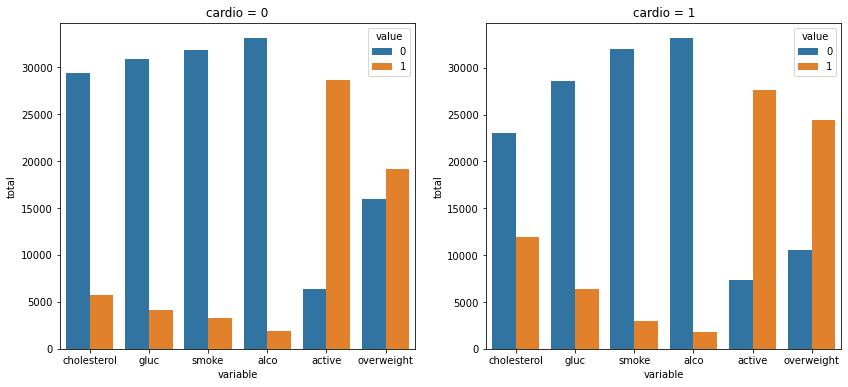

In [14]:
# method 1
fig, axis =plt.subplots(1,2 , figsize = (14,6))
sns.countplot(x="variable" , hue="value", data=df_cat[df_cat['cardio'] == 0], ax = axis[0])
axis[0].set_title('cardio = 0')
axis[0].set_ylabel('total')
sns.countplot(x="variable", hue="value", data=df_cat[df_cat['cardio'] == 1], ax = axis[1])
axis[1].set_title('cardio = 1')
axis[1].set_ylabel('total');

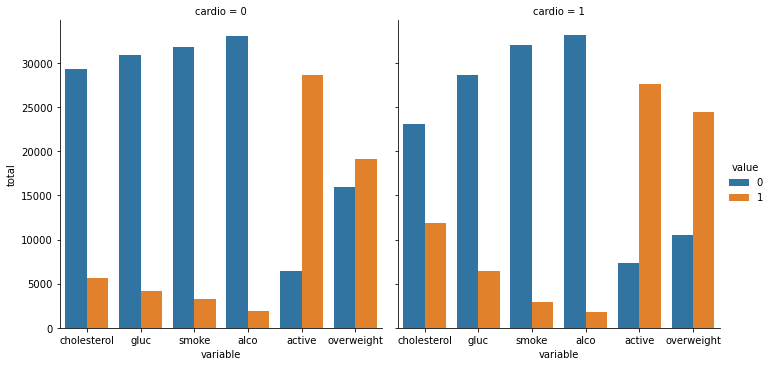

In [15]:
# method 2
fig = sns.catplot(x="variable" , kind = "count", col = 'cardio', hue="value", data=df_cat).set_axis_labels("variable", "total");

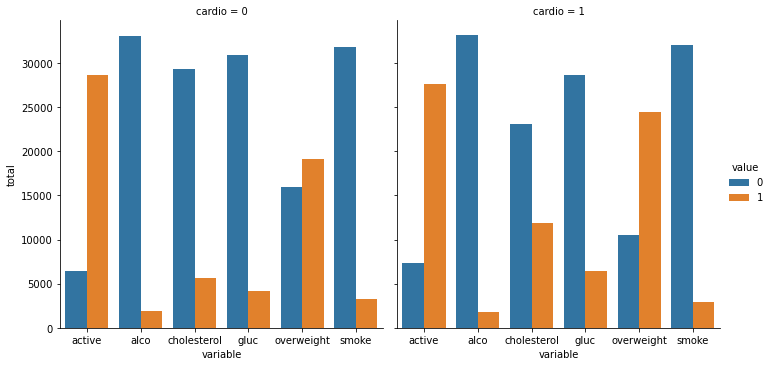

In [16]:
# method 3
'''
Group and reformat the data to split it by 'cardio'. 
Show the counts of each feature. 
You will have to rename one of the columns for the catplot to work correctly.
'''
df_cat = pd.DataFrame(df_cat.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns={'value': 'total'}).reset_index()

# Set up the matplotlib figure and draw the catplot
sns.catplot(x='variable', y='total', data=df_cat, hue='value', col='cardio', kind='bar')

In [17]:
# filtering data as per the insructions in the table
df_heat =df[(df['ap_lo'] <= df['ap_hi'])&
            (df['height'] >= df['height'].quantile(0.025))&
            (df['height'] <= df['height'].quantile(0.975))&
            (df['weight'] >= df['weight'].quantile(0.025))&
            (df['weight'] <= df['weight'].quantile(0.975))]     

In [18]:
# creating correlation matrix
corr= df_heat.corr()

In [19]:
# creating mask so as to hide upper triangualar values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

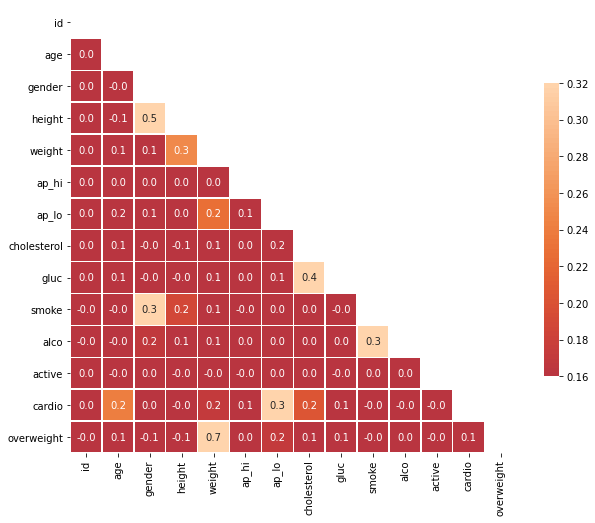

In [20]:
#plotting heatmap

fig, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(corr , annot = True , fmt='.1f', center = 0 , vmin=.16, vmax=.32, mask = mask , square = True, linewidths = 0.5, cbar_kws={'shrink':.45, 'format':'%.2f'} );